<a href="https://colab.research.google.com/github/bielzin42/NasaSpaceAppsDevlopmentArea-100.py/blob/master/Regre%C3%A7%C3%A3o_Linear_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WELCOME TO HELL**

In [0]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [0]:
###Chamando os nossos data sets
#Neste data set temos os dados do John Hopinkings + o de poluição unidos
pm_data = pd.read_csv("jon_pm.csv",sep =";", decimal=",") 
#Neste data set temos 
age_data = pd.read_csv("age_por.csv",sep =";", decimal=",")
print(age_data)


      fips      pm25  deaths_14%  ...     cr_44     cr_64    cr_100
0     1001  0.002576    0.017357  ...  0.185383  0.926917  5.665193
1     1003  0.002267    0.012149  ...  0.158472  0.690023  4.370928
2     1005  0.002437    0.016548  ...  0.163032  0.814872  4.934960
3     1007  0.002636    0.019320  ...  0.211217  0.915241  5.073775
4     1009  0.002476    0.013317  ...  0.175908  0.787260  4.872799
..     ...       ...         ...  ...       ...       ...       ...
471  16011  0.001396    0.023550  ...       NaN       NaN       NaN
472  16013  0.001097    0.029907  ...       NaN       NaN       NaN
473  16017  0.001109    0.010952  ...       NaN       NaN       NaN
474  16019  0.001251    0.020621  ...       NaN       NaN       NaN
475  16021  0.001151    0.012202  ...       NaN       NaN       NaN

[476 rows x 14 columns]


## **Regressão Linear Multipla**

0
intercept: [0.14390596]
slope: [[6.69577829 2.46944936]]
coefficient of determination: 0.37334189940216095


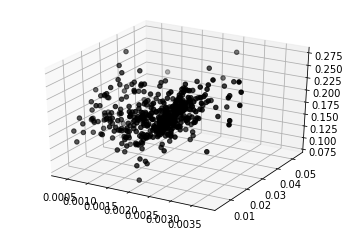

1
intercept: [0.25673375]
slope: [[18.03056491  1.47388388]]
coefficient of determination: 0.38307757177620927


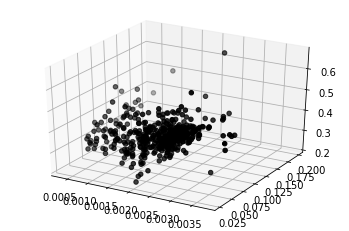

2
intercept: [0.29182162]
slope: [[-19.09403612   0.03839216]]
coefficient of determination: 0.16972638551093921


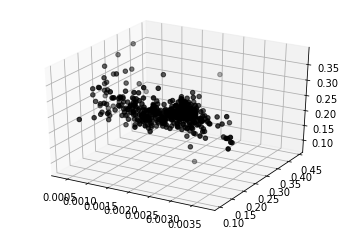

3
intercept: [-0.22765698]
slope: [[-4.6650717   0.54797398]]
coefficient of determination: 0.4394078502923331


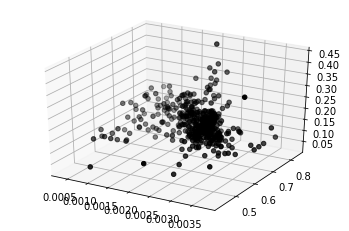

4
intercept: [0.02391179]
slope: [[2.38988711 0.25004532]]
coefficient of determination: 0.07501714048220509


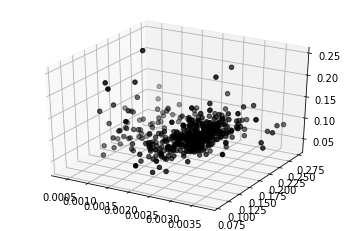

In [0]:
##Modelo de Regreção Linear
model = LinearRegression()

##Fornecendo os dados pm_data
#x = np.array(pm_data.iloc[:,[1]]).reshape((-1, 1))
#y = np.array(pm_data.iloc[:,[2]])

##Fornecendo os dados age_data
for i in range(5):
  x = np.array(age_data.iloc[0:466,[1,i+2]])#.reshape((-1, 1))
  y = np.array(age_data.iloc[0:466,[i+6]])
  print(i)

  #Encontrando os coeficientes lineares e angulares
  model.fit(x, y)
  intercept1, coefficients1 = model.intercept_, model.coef_
  print('intercept:', model.intercept_)
  print('slope:', model.coef_)

  #Encontrando R²
  r_sq = model.score(x, y)
  print('coefficient of determination:', r_sq)

  #Grafico
  X, Y, Z = x[:,0], x[:,1], y
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = "3d")
  ax.scatter(X, Y, Z, color='black')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_zlabel('')
  
  ##2D
  #plt.figure(i)
  #plt.scatter(x, y,  color='black')
  #plt.plot(x, y, color='blue', linewidth=3)
  plt.show()


##PREVISÃO
## y_pred = model.predict(x)
## print('predicted response:', y_pred, sep='\n')

## y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
## print('predicted response:', y_pred, sep='\n')

## **Regressão Polinomial Multipla**

0
coefficient of determination: 0.4357687519047316
intercept: [0.13770725]
coefficients: [[ -3.97163575   4.65248862 -39.15415531 488.14582542 -76.60341118]]


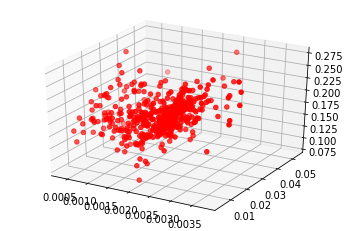

1
coefficient of determination: 0.43118266802866423
intercept: [0.25080129]
coefficients: [[ 8.25040863e-01  2.06725834e+00 -5.00399733e+03  4.24213976e+02
  -6.98531026e+00]]


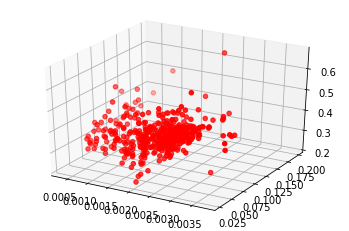

2
coefficient of determination: 0.20538552595446288
intercept: [0.22887415]
coefficients: [[ 3.80194585e+01  1.36848249e-01 -2.89997273e+03 -2.09787535e+02
   6.56508685e-01]]


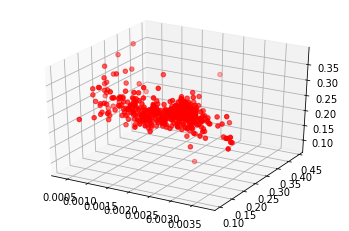

3
coefficient of determination: 0.4980708350546973
intercept: [0.59401178]
coefficients: [[-3.13315251e+01 -1.79004340e+00 -8.88933476e+03  9.41700297e+01
   1.57286427e+00]]


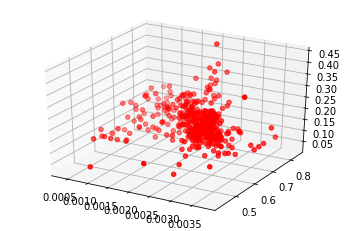

4
coefficient of determination: 0.12785724396548692
intercept: [0.13657318]
coefficients: [[-2.51144401e+01 -6.77874029e-01  9.79698584e+03 -4.54960273e+01
   2.52609307e+00]]


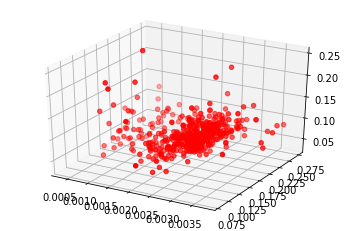

In [0]:
from sklearn.preprocessing import PolynomialFeatures

##Fornecendo os dados age_data
for i in range(5):
  x = np.array(age_data.iloc[0:466,[1,i+2]])#.reshape((-1, 1))
  y = np.array(age_data.iloc[0:466,[i+6]])
  print(i)

  #Declarando a função de regreção polinomial
  x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x) ##include_bias=True

  #Criando modelo de ajuste
  model = LinearRegression().fit(x_, y)

  #Respostas do Modelo de RPM
  r_sq = model.score(x_, y)
  intercept2, coefficients2 = model.intercept_, model.coef_
  print('coefficient of determination:', r_sq)
  print('intercept:', model.intercept_)
  print('coefficients:', model.coef_)

  #Grafico
  X, Y, Z = x[:,0], x[:,1], y
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = "3d")
  ax.scatter(X, Y, Z,color='red' )
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_zlabel("")  
  ##2D
  #plt.figure(i)
  #plt.scatter(x, y, )
  #plt.plot(x, y, color='blue', linewidth=3)
  plt.show()

## **Previsão**: Regressão Polinomial Multipla

In [0]:
###PREVISÃO
for i in range(5):
  #Dados de treinamento e testes
  x_train = np.array(age_data.iloc[0:395,[1,i+2]])#.reshape((-1, 1))
  x_test = np.array(age_data.iloc[396:466,[1,i+2]])
  #Dados de treinamento e testes
  y_train = np.array(age_data.iloc[0:395,[i+6]])
  y_test = np.array(age_data.iloc[396:466,[i+6]])
  print(i)

  #Declarando a função de regreção polinomial
  x_t_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train) ##include_bias=True
  x_t_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test) ##include_bias=True

  #Criando modelo de ajuste
  model = LinearRegression().fit(x_t_train, y_train)

  #Respostas do Modelo de RPM
  r_sq = model.score(x_t_train, y_train)
  intercept2, coefficients2 = model.intercept_, model.coef_
  print('coefficient of determination:', r_sq)
  print('intercept:', model.intercept_)
  print('coefficients:', model.coef_)

  y_pred = model.predict(x_t_test)


0
coefficient of determination: 0.9518743975807026
intercept: [-13825.14780195]
coefficients: [[ 7.96210820e+03  5.22384172e+01 -7.54119905e+02  1.33995036e+00
  -4.58321086e-04]]
1
coefficient of determination: 0.9795959546329338
intercept: [125182.86645389]
coefficients: [[-1.20878983e+04  1.88691265e+02 -1.84250780e+03  3.03714982e+01
  -9.66005805e-04]]
2
coefficient of determination: 0.9795471258477504
intercept: [316481.40500007]
coefficients: [[-8.84633845e+04  1.82271673e+02  2.28200445e+03  1.60184556e+01
   3.99816903e-05]]
3
coefficient of determination: 0.9835711182086115
intercept: [219643.60857338]
coefficients: [[-5.43587079e+04  2.79528215e+01  2.96838234e+03  1.80910981e+00
   3.13612253e-06]]
4
coefficient of determination: 0.9919264827562426
intercept: [-2173.18965278]
coefficients: [[ 6.04321807e+03  1.86285214e+01 -1.17816173e+03 -1.05647297e-01
   5.32557173e-07]]


##**Regressão linear avançada com statsmodels**

In [0]:
import statsmodels.api as sm

#Fornecendo os nossos dados
x = np.array(pm_data.iloc[:,[1,2]])#.reshape((-1, 1))
y = np.array(pm_data.iloc[:,[4]])

#Criando modelo
model = sm.OLS(y, x)

#Treinamento
results = model.fit()

#Resultados do nosso modelo
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.727e+33
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        22:03:03   Log-Likelihood:                          4094.3
No. Observations:                 147   AIC:                                     -8185.
Df Residuals:                     145   BIC:                                     -8179.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------